In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y=make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)

In [4]:
X.shape,Y.shape

((500, 2), (500,))

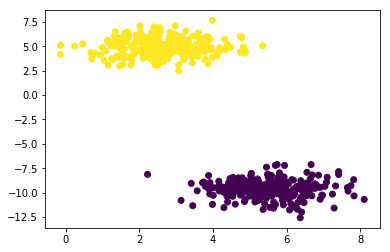

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

# Model and helper functions

In [8]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [21]:
#implement perceptron learning rate
def predict(X,weights):
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

def loss(X,Y,weights):      #binary cross entropy
    Y_predicts=predict(X,weights)     #y_hat
    cost=np.mean(-Y*np.log(Y_predicts)-(1-Y)*np.log(1-Y_predicts))   #J(W)
    return cost

def update(X,Y,weights,learning_rate):
    Y_predict=predict(X,weights)
    dW=np.dot(X.T,(Y_predict-Y))      #dJ(w)/d(w)
    
    m=X.shape[0]
    
    weights=weights-learning_rate*((dW)/float(m))
    return weights

def train(X,Y,learning_rate=0.5,max_epochs=500):
    #modify the input matrix to handle bias term
    
    P=np.ones((X.shape[0],1))
    X=np.hstack((P,X))
    
    weights=np.zeros(X.shape[1])
    
    
    for epochs in range(max_epochs):
        weights=update(X,Y,weights,learning_rate)
        
        if epochs%10==0:
            l=loss(X,Y,weights)
            print('Epoch %d loss %f',(epochs,l))
            
    return weights

In [28]:
w1=train(X,Y)

Epoch %d loss %f (0, 0.0005716427275807642)
Epoch %d loss %f (10, 0.0005380401348680319)
Epoch %d loss %f (20, 0.0005082724670657057)
Epoch %d loss %f (30, 0.00048171316755303334)
Epoch %d loss %f (40, 0.0004578656677465893)
Epoch %d loss %f (50, 0.00043633126162387657)
Epoch %d loss %f (60, 0.00041678607309178294)
Epoch %d loss %f (70, 0.0003989642457925612)
Epoch %d loss %f (80, 0.0003826454765941793)
Epoch %d loss %f (90, 0.00036764563598875856)
Epoch %d loss %f (100, 0.000353809618022774)
Epoch %d loss %f (110, 0.00034100582436112593)
Epoch %d loss %f (120, 0.0003291218622694079)
Epoch %d loss %f (130, 0.00031806115551691533)
Epoch %d loss %f (140, 0.0003077402496501158)
Epoch %d loss %f (150, 0.00029808665095261655)
Epoch %d loss %f (160, 0.0002890370795790513)
Epoch %d loss %f (170, 0.00028053604701416655)
Epoch %d loss %f (180, 0.0002725346896337068)
Epoch %d loss %f (190, 0.0002649898060803062)
Epoch %d loss %f (200, 0.0002578630580324423)
Epoch %d loss %f (210, 0.0002511203028

In [30]:
x1=np.linspace(0,8,10)
x2=(w1[0]+w1[1]*x1)/w1[2]

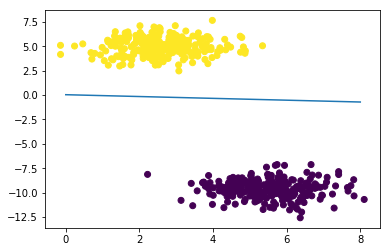

In [32]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2)
plt.show()